In [1]:
#Reloads the lab.py and crystals.py modules to update any changes (after saving)
#If a new method or object is created, autoreload doesn't work and the 
#kernel needs to be closed and halted after saving and making a 'checkpoint'
#in this notebook

%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib import ticker
import scipy.stats as stats 

In [3]:
#FLAT
file = open('instance_files/instance_db_aggagg_flat_returnclus', 'rb')
b1 = pickle.load(file)

#a=z b=y c=x

#dunnavan: a>= b >= c
#in our case z >= y >= x

nclusters = 300
rxs_flat = np.zeros((20,20,nclusters))
rys_flat = np.zeros((20,20,nclusters))
rzs_flat = np.zeros((20,20,nclusters))
phi2Ds_flat = np.zeros((20,20,nclusters))
cplxs_flat = np.zeros((20,20,nclusters))
dds_flat = np.zeros((20,20,nclusters))

counter=0       
for phi in range(20):
    for r in range(20):
        rxs_flat[phi, r, :] = np.array(b1[counter][0])[:,0]
        rys_flat[phi, r, :] = np.array(b1[counter][0])[:,1]
        rzs_flat[phi, r, :] = np.array(b1[counter][0])[:,2]
        phi2Ds_flat[phi, r, :] = b1[counter][1]
        cplxs_flat[phi, r, :] = b1[counter][2]
        dds_flat[phi, r, :] = b1[counter][3]
        counter+=1
phiba_flat = rys_flat/rzs_flat
phica_flat = rxs_flat/rzs_flat
np.shape(phica_flat)

(20, 20, 300)

In [7]:
#RAND
file = open('instance_files/instance_db_aggagg_rand_returnclus', 'rb')
b2 = pickle.load(file)

nclusters = 300
rxs_rand = np.zeros((20,20,nclusters))
rys_rand = np.zeros((20,20,nclusters))
rzs_rand = np.zeros((20,20,nclusters))
phi2Ds_rand = np.zeros((20,20,nclusters))
cplxs_rand = np.zeros((20,20,nclusters))
dds_rand = np.zeros((20,20,nclusters))

counter=0
for phi in range(20):
    for r in range(20):
        rxs_rand[phi, r, :] = np.array(b2[counter][0])[:,0]
        rys_rand[phi, r, :] = np.array(b2[counter][0])[:,1]
        rzs_rand[phi, r, :] = np.array(b2[counter][0])[:,2]
        phi2Ds_rand[phi, r, :] = b2[counter][1]
        cplxs_rand[phi, r, :] = b2[counter][2]
        dds_rand[phi, r, :] = b2[counter][3]
        counter+=1
phiba_rand = rys_rand/rzs_rand
phica_rand = rxs_rand/rzs_rand
np.shape(phica_rand)

(20, 20, 300)

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(5,15), sharex=True, sharey=True)
for row in range(3): 
    for r in range(3):
        print(row)
        color=list(np.random.choice(range(10), size=3)/10)
        ax = sns.jointplot(x=phiba[row, r*5,:], y=phica[row,r*5,:], color=color, shade=False, shade_lowest=False,
                                  kind='kde', ax=axs[row])
        #axs[row].scatter(x=phiba[row*5, r*5,:], y=phica[row*5,r*5,:], color=color)

#ax.set(xlabel='$phi$_ba', ylabel='$phi$_ca')
#ax.set_xlabel('$phi$_ba')
#ax.set_ylabel('$phi$_ca') 

In [ ]:
fig, axs = plt.subplots(10,10, figsize=(15,15), sharex=True, sharey=True)
#fig.subplots_adjust(hspace = .5, wspace=.001)
#axs1 = axs.ravel()
for row in range(10):
    for col in range(10):
        jointplot = sns.jointplot(x=phiba[row*2,col*2,:], y=phica[row*2,col*2,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                                  kind='kde', ax=axs[row, col], shade_lowest=False, cmap='Blues')
        ax = axs[row, col]
        ax.set_xlim(0.0,1.0)
        ax.set_ylim(0.0,1.0)

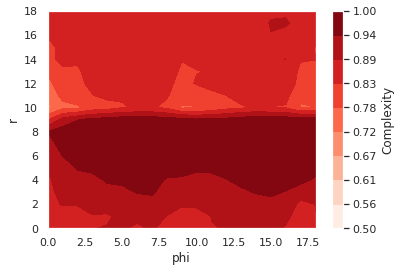

In [8]:
#RAND
fig,ax=plt.subplots(1,1)
xlist = np.arange(0, 19, 1)
ylist = np.arange(0, 19, 1)
X, Y = np.meshgrid(xlist, ylist)
ax.set_xlabel('phi')
ax.set_ylabel('r')
cp = ax.contourf(X,Y, np.mean(cplxs_rand[:-1,:-1,:], axis=2), levels=np.linspace(0.5, 1.0, 10),  cmap='Reds')
cbar = plt.colorbar(cp,format='%.2f')
cbar.set_label('Complexity')

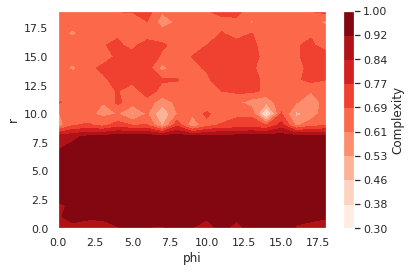

In [5]:
#FLAT
fig,ax=plt.subplots(1,1)
xlist = np.arange(0, 19, 1)
ylist = np.arange(0, 20, 1)
X, Y = np.meshgrid(xlist, ylist)
ax.set_xlabel('phi')
ax.set_ylabel('r')
cp = ax.contourf(X,Y,np.mean(cplxs_flat[:,:-1,:], axis=2), levels=np.linspace(0.3, 1.0, 10), cmap='Reds')
cbar = plt.colorbar(cp,format='%.2f')
cbar.set_label('Complexity')

In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20,2), sharex=True, sharey=True)

sns.set_style('white')
xs_flat = []
ys_flat=[]
for row in range(0,10):
    for r in range(19):
        jointplot = sns.jointplot(x=phiba_flat[row*2,10,:], y=phica_flat[row*2,10,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                              kind='kde', ax=axs[row], shade_lowest=False, shade=True,  n_levels=100)
        sns.jointplot(x=phiba_flat[row*2,r,:], y=phica_flat[row*2,r,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                                  kind='kde', ax=axs[row], shade_lowest=False, shade=True,  n_levels=100)
        
        ax = axs[row]
        for path in ax.collections[-1].get_paths():
            x, y = path.vertices.mean(axis=0)
            
            xs_flat.append(x)
            ys_flat.append(y)
            ax.plot(x, y, "ro", zorder=1)

        ax.set_xlim(0.0,1.0)
        ax.set_ylim(0.0,1.0)


#plt.tight_layout()


In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20,2), sharex=True, sharey=True)

sns.set_style('white')
xs_rand = []
ys_rand=[]
for row in range(0,10):
    for r in range(19):
        jointplot = sns.jointplot(x=phiba_rand[row*2,10,:], y=phica_rand[row*2,10,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                              kind='kde', ax=axs[row], shade_lowest=False, shade=True,  n_levels=100)
        sns.jointplot(x=phiba_rand[row*2,r,:], y=phica_rand[row*2,r,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                                  kind='kde', ax=axs[row], shade_lowest=False, shade=True,  n_levels=100)
        
        ax = axs[row]
        for path in ax.collections[-1].get_paths():
            x, y = path.vertices.mean(axis=0)
            
            xs_rand.append(x)
            ys_rand.append(y)
            ax.plot(x, y, "ro", zorder=1)

        ax.set_xlim(0.0,1.0)
        ax.set_ylim(0.0,1.0)


#plt.tight_layout()
'''
rand
[7.62154416e-03 2.14812692e-01 2.72897208e-01 3.27197862e-01
 3.81496917e-01 4.35821645e-01 4.88461816e-01 5.41019280e-01
 5.98565918e-01 6.76668744e-01 1.72073512e+00 2.26164630e+00
 2.62465446e+00 2.93723248e+00 3.24091716e+00 3.54873330e+00
 3.89497104e+00 4.29933583e+00 4.81586711e+00 5.59733508e+00
 2.79829585e+01]
 ''';

In [ ]:
params = {'axes.labelsize': 'small',
         'axes.titlesize':'small',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams["font.family"] = "NimbusSans-Regular"
plt.rcParams['font.size'] = 14
plt.rcParams.update(params)

NameError: name 'xs' is not defined

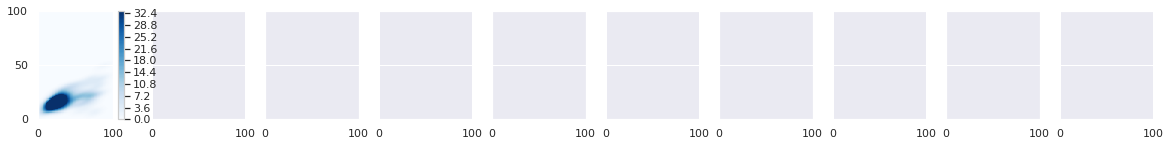

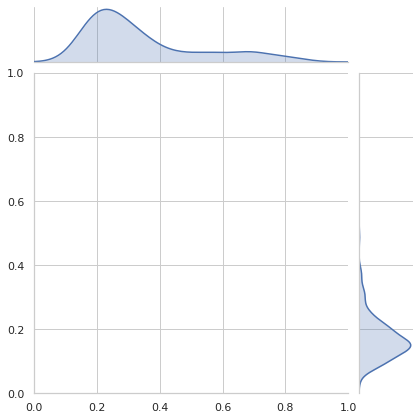

In [7]:
fig, axs = plt.subplots(1,10, figsize=(20,2), sharex=True, sharey=True)
#fig = plt.figure()
sns.set_style('whitegrid')

start=0
end=19

for row in range(0,10):
    jointplot = sns.jointplot(x=phiba_flat[row*2,10,:], y=phica_flat[row*2,10,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                              kind='kde', cmap='Blues',ax = axs[row], cbar=True,
                              shade_lowest=False, shade=True, n_levels=100)

    ax = axs[row]    

    for path in ax.collections[-1].get_paths():
        x, y = path.vertices.mean(axis=0)
    data = np.vstack([phiba_flat[row*2,10,:], phica_flat[row*2,10,:]])
    kde = stats.gaussian_kde(data)

    # evaluate on a regular grid
    xgrid = np.arange(0, 1.01, 0.01)
    ygrid = np.arange(0, 1.01, 0.01)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

    img = ax.imshow(Z.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               cmap='Blues', vmin=0, vmax=10)
    
    for x,y in zip(xs_flat[start:end],ys_flat[start:end]):
        ax.plot(x*100,y*100, "r+")
    start+=19
    end+=19
    
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_yticks([0,20,40,60,80,100])
    ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

cb = plt.colorbar(img, ax=ax, ticks=[0,5,10,20,30])
cb.ax.set_yticklabels([0,5,10,20,30])

fig.savefig('phi_ba_ca_flat_meshkde_flat.eps');


In [ ]:
fig, axs = plt.subplots(1,10, figsize=(20,2), sharex=True, sharey=True)
#fig = plt.figure()
sns.set_style('whitegrid')

start=0
end=19

for row in range(0,10):
    jointplot = sns.jointplot(x=phiba_rand[row*2,10,:], y=phica_rand[row*2,10,:], xlim=(0.0,1.0), ylim=(0.0,1.0),
                              kind='kde', cmap='Blues',ax = axs[row], cbar=True,
                              shade_lowest=False, shade=True, n_levels=100)

    ax = axs[row]    

    for path in ax.collections[-1].get_paths():
        x, y = path.vertices.mean(axis=0)
    data = np.vstack([phiba_rand[row*2,10,:], phica_rand[row*2,10,:]])
    kde = stats.gaussian_kde(data)

    # evaluate on a regular grid
    xgrid = np.arange(0, 1.01, 0.01)
    ygrid = np.arange(0, 1.01, 0.01)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

    img = ax.imshow(Z.reshape(Xgrid.shape),
               origin='lower', aspect='auto',
               cmap='Reds', vmin=0, vmax=10)
    
    for x,y in zip(xs_rand[start:end],ys_rand[start:end]):
        ax.plot(x*100,y*100, "r+")
    start+=19
    end+=19
    
    ax.set_xticks([0,20,40,60,80,100])
    ax.set_yticks([0,20,40,60,80,100])
    ax.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

cb = plt.colorbar(img, ax=ax, ticks=[0,5,10,20,30])
cb.ax.set_yticklabels([0,5,10,20,30])

fig.savefig('phi_ba_ca_flat_meshkde_rand.eps');


0
1
2
3
4
5
6
7
8
9


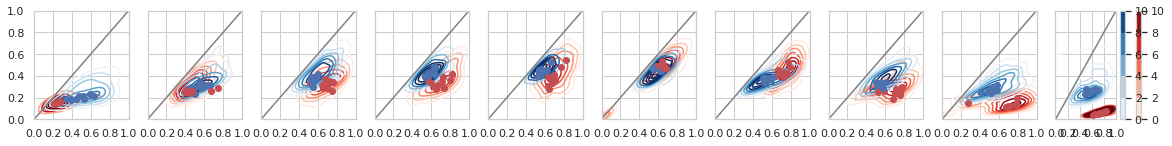

In [17]:
fig, axs = plt.subplots(1,10, figsize=(20,2), sharex=True, sharey=True)
#fig = plt.figure()
sns.set_style('whitegrid')

start=0
end=19

i=0
for i in range(0,10):
    
    print(i)
    #modes
    for r in range(0,10):
        data_rand = np.vstack([phiba_rand[i*2,r,:], phica_rand[i*2,r,:]])
        kde_rand = stats.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[i*2,r,:], phica_flat[i*2,r,:]])
        kde_flat = stats.gaussian_kde(data_flat)

        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)

        modes_rand = np.where(Z_rand==np.max(Z_rand))
        modes_flat = np.where(Z_flat==np.max(Z_flat))
        axs[i].plot(float(modes_rand[1]), float(modes_rand[0]), 'bo')
        axs[i].plot(float(modes_flat[1]), float(modes_flat[0]), 'ro')

    #img = axs[i].imshow(Z_rand, origin='lower', aspect='auto',
    #           cmap='Blues', vmin=1, vmax=10)
    
    r=10
    data_rand = np.vstack([phiba_rand[i*2,r,:], phica_rand[i*2,r,:]])
    kde_rand = stats.gaussian_kde(data_rand)
    data_flat = np.vstack([phiba_flat[i*2,r,:], phica_flat[i*2,r,:]])
    kde_flat = stats.gaussian_kde(data_flat)

    # evaluate on a regular grid
    xgrid = np.arange(0.0, 1.01, 0.01)
    ygrid = np.arange(0.0, 1.01, 0.01)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

    Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_rand = Z_rand.reshape(Xgrid.shape)
    Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_flat = Z_flat.reshape(Xgrid.shape)
    
    img = axs[i].contour(Z_flat, cmap='Reds', vmin=1, vmax=10)
    img = axs[i].contour(Z_rand, cmap='Blues', vmin=1, vmax=10)

#     for x,y in zip(xs[start:end],ys[start:end]):
#         ax.plot(x*100,y*100, "r+")
#     start+=19
#     end+=19
    axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '- -', zorder=2)
    axs[i].set_xticks([0,20,40,60,80,100])
    axs[i].set_yticks([0,20,40,60,80,100])
    axs[i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[i].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    i+=1
#cb = plt.colorbar(img, ax=axs[i-1], format='%.1f')
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(Z_flat)
m.set_clim(0., 10.)
c = plt.cm.ScalarMappable(cmap='Blues')
c.set_array(Z_rand)
c.set_clim(0., 10.)
plt.colorbar(m, boundaries=np.linspace(0, 10, 6))
plt.colorbar(c, boundaries=np.linspace(0, 10, 6))


fig.savefig('phi_ba_ca_aggagg_randflat_pdfs.eps');


0
1
2
3
4
5
6
7
8
9


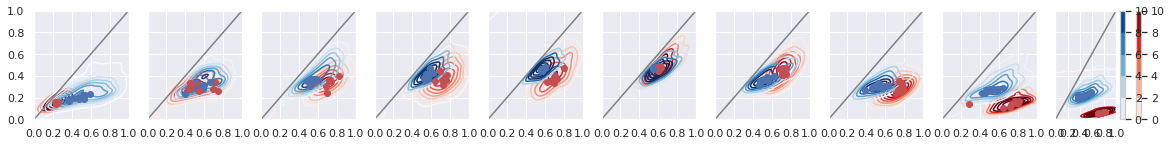

In [7]:
fig, axs = plt.subplots(1,10, figsize=(20,2), sharex=True, sharey=True)
#fig = plt.figure()
sns.set_style('whitegrid')

start=0
end=19

i=0
for i in range(0,10):
    
    print(i)
    #modes
    for r in range(0,10):
        data_rand = np.vstack([phiba_rand[i*2,r,:], phica_rand[i*2,r,:]])
        kde_rand = stats.gaussian_kde(data_rand)
        data_flat = np.vstack([phiba_flat[i*2,r,:], phica_flat[i*2,r,:]])
        kde_flat = stats.gaussian_kde(data_flat)

        # evaluate on a regular grid
        xgrid = np.arange(0.0, 1.01, 0.01)
        ygrid = np.arange(0.0, 1.01, 0.01)
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
    
        Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_rand = Z_rand.reshape(Xgrid.shape)
        Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        Z_flat = Z_flat.reshape(Xgrid.shape)

        modes_rand = np.where(Z_rand==np.max(Z_rand))
        modes_flat = np.where(Z_flat==np.max(Z_flat))
        axs[i].plot(float(modes_rand[1]), float(modes_rand[0]), 'bo')
        axs[i].plot(float(modes_flat[1]), float(modes_flat[0]), 'ro')

    #img = axs[i].imshow(Z_rand, origin='lower', aspect='auto',
    #           cmap='Blues', vmin=1, vmax=10)
    
    r=10
    data_rand = np.vstack([phiba_rand[i*2,r,:], phica_rand[i*2,r,:]])
    kde_rand = stats.gaussian_kde(data_rand)
    data_flat = np.vstack([phiba_flat[i*2,r,:], phica_flat[i*2,r,:]])
    kde_flat = stats.gaussian_kde(data_flat)

    # evaluate on a regular grid
    xgrid = np.arange(0.0, 1.01, 0.01)
    ygrid = np.arange(0.0, 1.01, 0.01)
    Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

    Z_rand = kde_rand.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_rand = Z_rand.reshape(Xgrid.shape)
    Z_flat = kde_flat.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
    Z_flat = Z_flat.reshape(Xgrid.shape)
    
    img = axs[i].contour(Z_flat, cmap='Reds', vmin=1, vmax=10)
    img = axs[i].contour(Z_rand, cmap='Blues', vmin=1, vmax=10)

#     for x,y in zip(xs[start:end],ys[start:end]):
#         ax.plot(x*100,y*100, "r+")
#     start+=19
#     end+=19
    axs[i].plot(np.linspace(0.0,100,10),np.linspace(0.0,100,10), 'gray', '- -', zorder=2)
    axs[i].set_xticks([0,20,40,60,80,100])
    axs[i].set_yticks([0,20,40,60,80,100])
    axs[i].set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    axs[i].set_yticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    i+=1
#cb = plt.colorbar(img, ax=axs[i-1], format='%.1f')
m = plt.cm.ScalarMappable(cmap='Reds')
m.set_array(Z_flat)
m.set_clim(0., 10.)
c = plt.cm.ScalarMappable(cmap='Blues')
c.set_array(Z_rand)
c.set_clim(0., 10.)
plt.colorbar(m, boundaries=np.linspace(0, 10, 6))
plt.colorbar(c, boundaries=np.linspace(0, 10, 6))


fig.savefig('phi_ba_ca_aggagg_randflat_pdfs.eps');
